In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [3]:
ratings=pd.read_pickle('/content/drive/MyDrive/추천 시스템/data/ml-latest-small/ratings_updated.p')
genres=pd.read_pickle('/content/drive/MyDrive/추천 시스템/data/ml-latest-small/genres.p')

# User Profile

In [13]:
user414=ratings[ratings['userId']==414]
user414.sample()

,userId,movieId,rating,tstamp
684925,414,919,4.0,2006-11-09 15:08:59


In [14]:
len(user414)

1190

In [15]:
user414=user414.merge(genres,left_on='movieId',right_index=True)
user414.sample()

,userId,movieId,rating,tstamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
608970,414,3949,5.0,2007-06-09 14:43:39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X_train

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
759702,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3195411,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2573302,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1830591,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2407418,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190933,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1785140,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
457358,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3861037,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
y_train

759702     4.0
3195411    4.5
2573302    4.0
1830591    3.5
2407418    4.5
          ... 
1190933    3.0
1785140    4.5
457358     4.5
3861037    2.5
3211970    4.0
Name: rating, Length: 956, dtype: float64

## train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(user414[genres.columns],
                                               user414['rating'],
                                               random_state=42,
                                               test_size=0.1)

In [20]:
# feature ,x: y를 예측하기 위해 필요한 정보들
# label, y: 정답
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(956, 20)
(956,)
(107, 20)
(107,)


## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg=LinearRegression()

In [28]:
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
reg.coef_

array([ 0.44277472, -0.07356081,  0.09982667,  0.19907834,  0.03141928,
       -0.15886208,  0.21075079,  0.2710147 ,  0.22204545,  0.00877891,
       -0.0672302 , -0.23772249,  0.03130717,  0.05213503, -0.05871859,
        0.12463383,  0.03233342, -0.02577624,  0.18128754,  0.2497849 ])

In [33]:
reg.intercept_
#아무 장르가 없는 영화에 3.807점을 준다.

3.8072252804110063

In [34]:
list(zip(X_train.columns,reg.coef_))

[('(no genres listed)', 0.442774719588992),
 ('Action', -0.07356081219905042),
 ('Adventure', 0.099826673836739),
 ('Animation', 0.19907833889049784),
 ('Children', 0.03141928362874021),
 ('Comedy', -0.15886207846013228),
 ('Crime', 0.21075079436944946),
 ('Documentary', 0.27101470393257254),
 ('Drama', 0.22204545270426734),
 ('Fantasy', 0.008778907372459975),
 ('Film-Noir', -0.06723020451018541),
 ('Horror', -0.23772248522117456),
 ('IMAX', 0.031307172753083916),
 ('Musical', 0.05213502828294851),
 ('Mystery', -0.05871858730682889),
 ('Romance', 0.1246338283465516),
 ('Sci-Fi', 0.032333420898463916),
 ('Thriller', -0.025776242083659945),
 ('War', 0.18128753552622315),
 ('Western', 0.2497849036626843)]

In [36]:
#baseline score + Action 장르에 대한 coefficient
reg.intercept_ + reg.coef_[1]

3.733664468211956

In [37]:
#baseline score + Action 장르에 대한 coefficient +  Adventure 장르에 대한 coefficient
reg.intercept_ + reg.coef_[1] + reg.coef_[2]

3.833491142048695

In [38]:
%matplotlib inline

<Axes: >

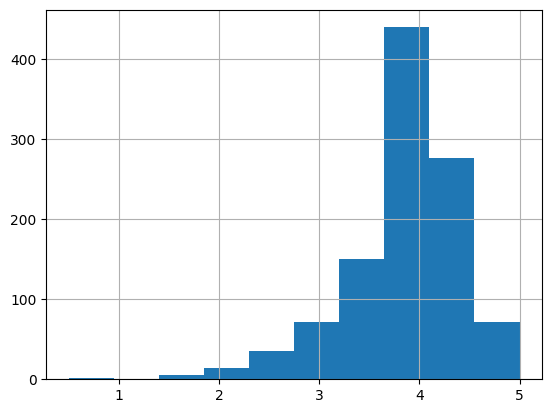

In [42]:
user414['rating'].hist()

<Axes: >

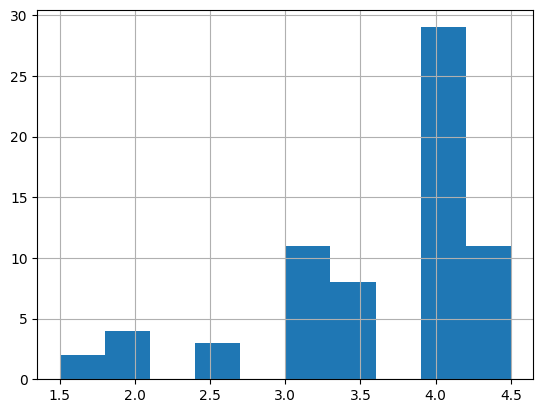

In [41]:
#user414['rating'].hist()
user414.loc[user414['Horror']==1,'rating'].hist()

<Axes: >

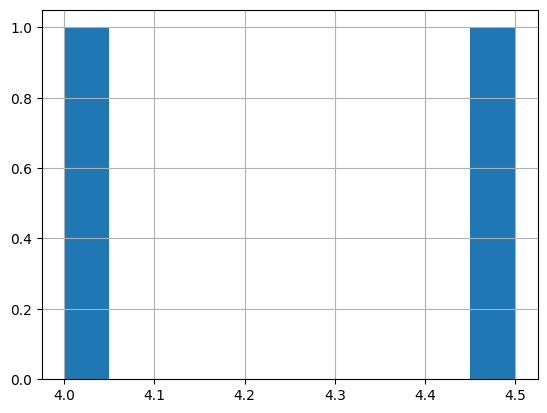

In [43]:
user414.loc[user414['(no genres listed)']==1,'rating'].hist()

In [44]:
predict=reg.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error

In [48]:
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
rmse

0.7373691999440043

## 전체 데이터로 확장

In [55]:
ratings=ratings.merge(genres,left_on='movieId',right_index=True)
ratings.sample()

,userId,movieId,rating,tstamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1190113,6636,81562,3.0,2020-12-25 15:29:39,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
train,test=train_test_split(ratings,test_size=0.1,random_state=42)

In [58]:
user_profile_list=[]

for userId in train['userId'].unique():
  user=train[train['userId']==userId]
  X_train=user[genres.columns] #feature
  y_train=user['rating']  #label,y

  reg=LinearRegression()
  reg.fit(X_train,y_train)
  user_profile_list.append([reg.intercept_,*reg.coef_])

In [59]:
user_profile=pd.DataFrame(user_profile_list,index=train['userId'].unique(),columns=['intercept',*genres.columns])

In [60]:
user_profile

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4073,3.794234,2.057662e-01,-7.253677e-02,2.262598e-01,2.220446e-16,4.440892e-16,-1.061829e-01,0.106026,7.057662e-01,0.121542,...,-1.826769e+00,0.490656,-0.345873,3.885781e-16,0.044405,3.863182e-02,0.317879,0.282766,-0.052814,0.656761
6393,4.726424,2.735756e-01,-3.384906e-01,1.002438e-03,-3.156678e+00,-4.226553e-01,-7.362188e-02,0.038477,-1.013344e-01,0.034424,...,-2.081668e-16,-0.284546,-0.061691,4.546876e-02,-0.159598,-2.211800e-01,0.037375,-0.002529,-0.183653,0.210600
931,3.647967,0.000000e+00,-1.999865e-01,-1.182178e-02,9.226026e-01,-9.698459e-01,-2.847083e-01,0.363463,-9.417449e-02,0.231038,...,5.808415e-01,-0.001401,-0.040722,4.412069e-01,-0.028263,-6.955215e-02,0.083999,-0.259539,0.042363,0.263518
2649,3.767909,9.820912e-01,-6.265524e-02,-5.222158e-02,2.759830e-01,-1.350643e-01,-2.189770e-01,0.041719,5.648500e-01,0.196342,...,1.770314e-01,0.012559,-0.093146,1.159866e-01,0.143150,1.306699e-01,-0.156068,0.050016,0.196640,0.189996
1873,2.978245,-7.282454e-01,-2.372407e-01,3.016571e-02,6.112538e-01,-3.787562e-01,2.441685e-01,0.082466,-1.353301e-01,0.227086,...,1.022994e+00,0.061602,0.019418,1.342810e-01,0.084984,-9.062537e-02,-0.210643,0.009812,0.168611,-0.369944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,4.452381,-4.718448e-16,-2.380952e-01,-8.571429e-01,1.318390e-16,5.551115e-17,-2.380952e-01,-0.500000,-1.387779e-16,0.547619,...,-5.551115e-17,0.309524,-0.761905,0.000000e+00,-0.500000,-4.901562e-15,-0.238095,0.738095,0.238095,0.238095
5304,4.083333,4.024558e-15,-2.083333e-01,3.583333e+00,-1.416667e+00,-1.416667e+00,4.166667e-01,0.458333,4.440892e-16,0.125000,...,-6.661338e-16,0.583333,4.458333,0.000000e+00,0.000000,-1.000000e+00,-3.458333,-0.583333,-1.625000,0.000000
6076,4.777778,-6.661338e-16,-1.110223e-16,2.220446e-16,0.000000e+00,0.000000e+00,2.506015e-16,0.333333,0.000000e+00,-1.111111,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-7.777778e-01,0.000000,-1.888889,0.000000,0.000000
4725,3.639706,2.775558e-17,6.617647e-02,-8.088235e-02,-3.469447e-18,0.000000e+00,1.102941e-01,0.132353,0.000000e+00,0.051471,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-2.941176e-02,0.000000,0.066176,0.000000,0.000000


In [61]:
user_profile.loc[1000]

intercept             3.704642
(no genres listed)    0.295358
Action               -0.041670
Adventure            -0.074506
Animation             0.310680
Children             -0.200327
Comedy               -0.123554
Crime                 0.082014
Documentary           0.270173
Drama                 0.111083
Fantasy              -0.178339
Film-Noir             0.250107
Horror                0.198238
IMAX                 -0.315068
Musical               0.031630
Mystery              -0.001722
Romance              -0.130101
Sci-Fi               -0.124321
Thriller             -0.145945
War                   0.004493
Western               0.327677
Name: 1000, dtype: float64

### 평점 예측하기

In [68]:
for idx,row in test.iterrows():
  user=row['userId']
  print(sum(row['movieId'],user_profile.loc[user,genres.columns] * row[genres.columns])+user_profile.loc[user,'intercept'])
  break

99114 (no genres listed)         0.0
Action               -0.523079
Adventure                 -0.0
Animation                 -0.0
Children                  -0.0
Comedy                     0.0
Crime                     -0.0
Documentary                0.0
Drama                  0.12211
Fantasy                    0.0
Film-Noir                  0.0
Horror                    -0.0
IMAX                      -0.0
Musical                   -0.0
Mystery                    0.0
Romance                    0.0
Sci-Fi                     0.0
Thriller                   0.0
War                        0.0
Western               0.880816
dtype: object


In [73]:
for idx,row in test.iterrows():
  print(idx)
  print(row)
  break

2468591
userId                               4615
movieId                             99114
rating                                5.0
tstamp                2019-10-26 08:03:19
(no genres listed)                      0
Action                                  1
Adventure                               0
Animation                               0
Children                                0
Comedy                                  0
Crime                                   0
Documentary                             0
Drama                                   1
Fantasy                                 0
Film-Noir                               0
Horror                                  0
IMAX                                    0
Musical                                 0
Mystery                                 0
Romance                                 0
Sci-Fi                                  0
Thriller                                0
War                                     0
Western                   

In [83]:
test.loc[1397]

KeyError: 1397

In [81]:
user_profile

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4073,3.794234,2.057662e-01,-7.253677e-02,2.262598e-01,2.220446e-16,4.440892e-16,-1.061829e-01,0.106026,7.057662e-01,0.121542,...,-1.826769e+00,0.490656,-0.345873,3.885781e-16,0.044405,3.863182e-02,0.317879,0.282766,-0.052814,0.656761
6393,4.726424,2.735756e-01,-3.384906e-01,1.002438e-03,-3.156678e+00,-4.226553e-01,-7.362188e-02,0.038477,-1.013344e-01,0.034424,...,-2.081668e-16,-0.284546,-0.061691,4.546876e-02,-0.159598,-2.211800e-01,0.037375,-0.002529,-0.183653,0.210600
931,3.647967,0.000000e+00,-1.999865e-01,-1.182178e-02,9.226026e-01,-9.698459e-01,-2.847083e-01,0.363463,-9.417449e-02,0.231038,...,5.808415e-01,-0.001401,-0.040722,4.412069e-01,-0.028263,-6.955215e-02,0.083999,-0.259539,0.042363,0.263518
2649,3.767909,9.820912e-01,-6.265524e-02,-5.222158e-02,2.759830e-01,-1.350643e-01,-2.189770e-01,0.041719,5.648500e-01,0.196342,...,1.770314e-01,0.012559,-0.093146,1.159866e-01,0.143150,1.306699e-01,-0.156068,0.050016,0.196640,0.189996
1873,2.978245,-7.282454e-01,-2.372407e-01,3.016571e-02,6.112538e-01,-3.787562e-01,2.441685e-01,0.082466,-1.353301e-01,0.227086,...,1.022994e+00,0.061602,0.019418,1.342810e-01,0.084984,-9.062537e-02,-0.210643,0.009812,0.168611,-0.369944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,4.452381,-4.718448e-16,-2.380952e-01,-8.571429e-01,1.318390e-16,5.551115e-17,-2.380952e-01,-0.500000,-1.387779e-16,0.547619,...,-5.551115e-17,0.309524,-0.761905,0.000000e+00,-0.500000,-4.901562e-15,-0.238095,0.738095,0.238095,0.238095
5304,4.083333,4.024558e-15,-2.083333e-01,3.583333e+00,-1.416667e+00,-1.416667e+00,4.166667e-01,0.458333,4.440892e-16,0.125000,...,-6.661338e-16,0.583333,4.458333,0.000000e+00,0.000000,-1.000000e+00,-3.458333,-0.583333,-1.625000,0.000000
6076,4.777778,-6.661338e-16,-1.110223e-16,2.220446e-16,0.000000e+00,0.000000e+00,2.506015e-16,0.333333,0.000000e+00,-1.111111,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-7.777778e-01,0.000000,-1.888889,0.000000,0.000000
4725,3.639706,2.775558e-17,6.617647e-02,-8.088235e-02,-3.469447e-18,0.000000e+00,1.102941e-01,0.132353,0.000000e+00,0.051471,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-2.941176e-02,0.000000,0.066176,0.000000,0.000000


In [75]:
from tqdm import tqdm_notebook

In [82]:
predict=[]
for idx,row in tqdm_notebook(test.iterrows()):
  user=row['userId']
  if(user==1397):
    continue
  intercept=user_profile.loc[user,'intercept']
  genre_score=sum(user_profile.loc[user,genres.columns]*row[genres.columns])
  expected_score=intercept+genre_score
  predict.append(expected_score)


0it [00:00, ?it/s]

In [87]:
test = test.drop(test.index[-1])

In [88]:
test['predict']=predict

In [90]:
rmse=np.sqrt(mean_squared_error(test['rating'],test['predict']))
rmse

0.9695862128487795

## 문제는?
- 데이터 갯수가 작은 user에게 coefficient 계산이 정확하지 않음, 또는 Train 데이터만 설명할수 있음
-해결책은?
  -빈도수가 낮은 장르 없애기
  -correlation이 높은 장르들을 합치기
  -데이터가 적은 user에 대해서 전체 평균을 적용,user별 평균,content based 1번 방법론 사용 (하나의 모델에 다양한 알고리즘 적용 == 앙상블)
  -정규화 가능한 linear model 사용하기 (Ridge,Lasso)